In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 60s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [7]:
classes = ['airplane','automobiles','bird','cat','deer','dog','frog','horse','ship','truck']

Text(0.5, 0, 'dog')

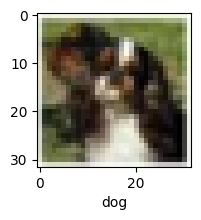

In [8]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[500])
plt.xlabel(classes[y_train[500]])

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
model = Sequential()

model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(3000,activation="relu"))
model.add(Dense(1000,activation="relu"))
model.add(Dense(10,activation="softmax"))

C:\Users\abhis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3000)           │     9,219,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     3,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,230,010 (46.65 MB)

 Trainable params: 12,230,010 (46.65 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="SGD",metrics = ['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs = 5,validation_split=0.2)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.2965 - loss: 1.9514 - val_accuracy: 0.4006 - val_loss: 1.7084
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.4144 - loss: 1.6633 - val_accuracy: 0.4007 - val_loss: 1.6729
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.4451 - loss: 1.5770 - val_accuracy: 0.4412 - val_loss: 1.5830
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.4635 - loss: 1.5204 - val_accuracy: 0.4551 - val_loss: 1.5390
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.4869 - loss: 1.4600 - val_accuracy: 0.4545 - val_loss: 1.5430


In [14]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report: \n', classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.51      0.52      1000
           1       0.53      0.64      0.58      1000
           2       0.47      0.14      0.21      1000
           3       0.36      0.35      0.35      1000
           4       0.31      0.64      0.42      1000
           5       0.59      0.12      0.19      1000
           6       0.51      0.52      0.51      1000
           7       0.59      0.45      0.51      1000
           8       0.47      0.75      0.58      1000
           9       0.52      0.48      0.50      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.44     10000
weighted avg       0.49      0.46      0.44     10000

